In [123]:
df = pd.read_csv('./historical data/AAPL_5_yrs.csv', parse_dates=['Date'])

           Date  Close/Last  5-Day Rolling Mean  21-Day Rolling Mean
1255 2020-06-04     80.5800                 NaN                  NaN
1254 2020-06-05     82.8750                 NaN                  NaN
1253 2020-06-08     83.3650                 NaN                  NaN
1252 2020-06-09     85.9975                 NaN                  NaN
1251 2020-06-10     88.2100             84.2055                  NaN
1250 2020-06-11     83.9750             84.8845                  NaN
1249 2020-06-12     84.7000             85.2495                  NaN
1248 2020-06-15     85.7475             85.7260                  NaN
1247 2020-06-16     88.0200             86.1305                  NaN
1246 2020-06-17     87.8975             86.0680                  NaN
1245 2020-06-18     87.9325             86.8595                  NaN
1244 2020-06-19     87.4300             87.4055                  NaN
1243 2020-06-22     89.7175             88.1995                  NaN
1242 2020-06-23     91.6325       

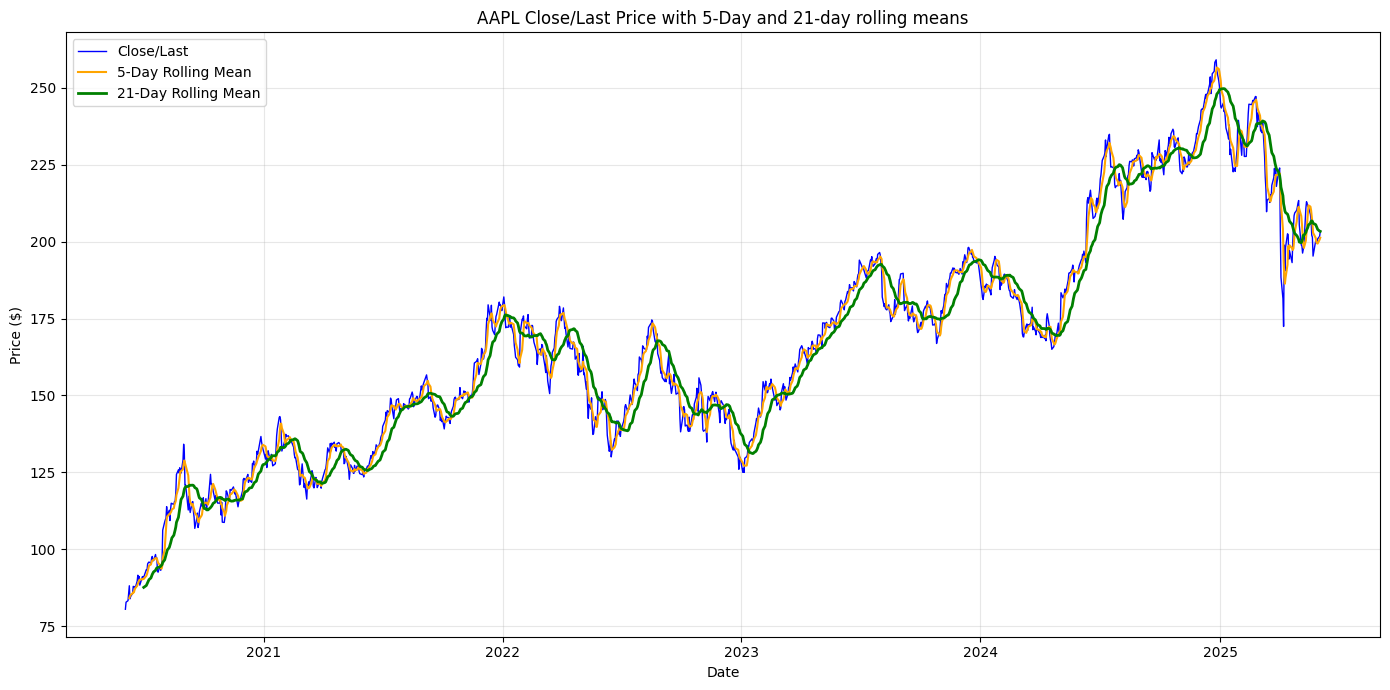

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('./historical data/AAPL_5_yrs.csv', parse_dates=['Date'])

# Convert 'Date' to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Remove dollar signs and convert to float
price_columns = ['Close/Last', 'Open', 'High', 'Low']
for col in price_columns:
    df[col] = df[col].replace('[\\$,]', '', regex=True).astype(float)

# Sort by date (optional but useful for plotting)
df.sort_values('Date', inplace=True)

# Add a 5-day rolling mean
df['5-Day Rolling Mean'] = df['Close/Last'].rolling(window=5).mean()

# Add a 21-Day Rolling Mean
df['21-Day Rolling Mean'] = df['Close/Last'].rolling(window=21).mean()

# Inspect the first few rows (includes NaN for first rows due to rolling mean)
print(df[['Date', 'Close/Last', '5-Day Rolling Mean', '21-Day Rolling Mean']].head(35))

# Plot the data
plt.figure(figsize=(14, 7))

# Plot Close/Last
plt.plot(df['Date'], df['Close/Last'], label='Close/Last', color='blue', linewidth=1)

# Plot 5-day rolling mean
plt.plot(df['Date'], df['5-Day Rolling Mean'], label='5-Day Rolling Mean', color='orange', linewidth=1.5)

# Plot 21-Day Rolling Mean
plt.plot(df['Date'], df['21-Day Rolling Mean'], label='21-Day Rolling Mean', color='green', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('AAPL Close/Last Price with 5-Day and 21-day rolling means')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

#### Identify absolute min/max

In [15]:
# Find max and min
max_idx = df['Close/Last'].idxmax()
min_idx = df['Close/Last'].idxmin()

max_date = df.loc[max_idx, 'Date']
max_price = df.loc[max_idx, 'Close/Last']
min_date = df.loc[min_idx, 'Date']
min_price = df.loc[min_idx, 'Close/Last']

#### Visualize the Data

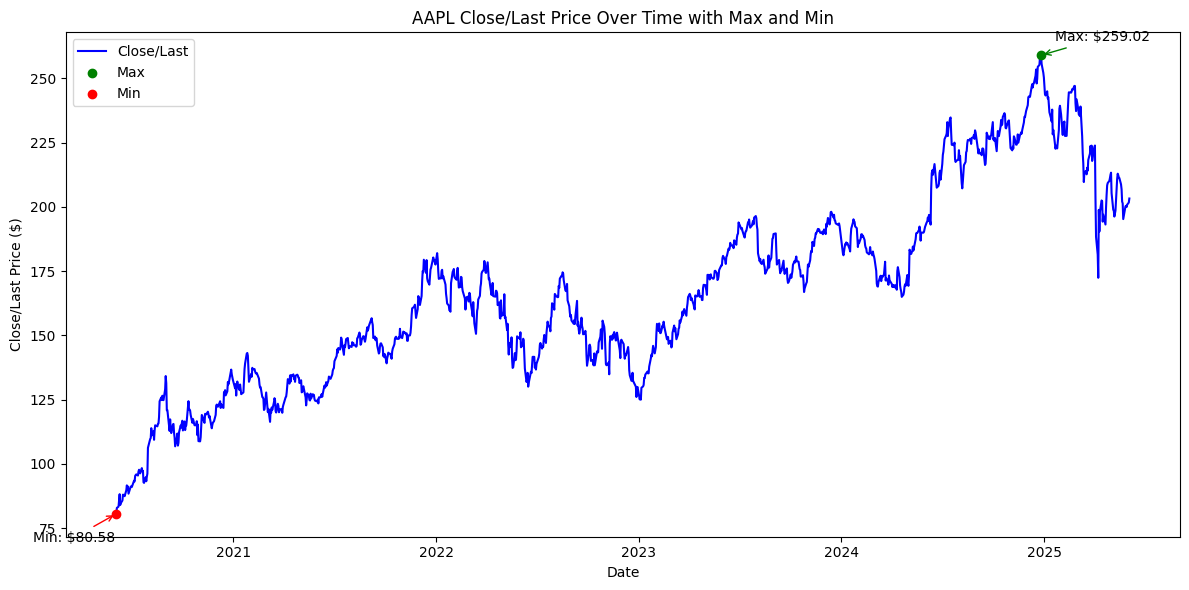

In [16]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close/Last'], label='Close/Last', color='blue')

# Highlight max
plt.scatter(max_date, max_price, color='green', label='Max', zorder=5)
plt.annotate(f'Max: ${max_price:.2f}', (max_date, max_price),
             xytext=(10, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='green'))

# Highlight min
plt.scatter(min_date, min_price, color='red', label='Min', zorder=5)
plt.annotate(f'Min: ${min_price:.2f}', (min_date, min_price),
             xytext=(-60, -20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'))

plt.xlabel('Date')
plt.ylabel('Close/Last Price ($)')
plt.title('AAPL Close/Last Price Over Time with Max and Min')
plt.legend()
plt.tight_layout()
plt.show()

#### High/lows

In [126]:
import pandas as pd

# Assuming df is your DataFrame and sorted by Date
prices = df['Close/Last'].values
dates = df['Date'].values
mean_5 = df["5-Day Rolling Mean"].values
mean_30 = df["21-Day Rolling Mean"].values

inflexion_points = []
inflexion_dates = []
High_low_point = []
Rolling_Mean_5_days = []
Rolling_Mean_21_days = []

if len(prices) < 2:
    print("Not enough data for inflection points.")
else:

    for i in range(1, len(prices) - 1):
        previous_price = prices[i-1]
        current_price = prices[i]
        next_price = prices[i+1]
        mean_5_value = mean_5[i]
        mean_30_value = mean_30[i]
        # print(f"previous_price: {previous_price}, current_price: {current_price}, next_price: {next_price}")

        if current_price > previous_price and next_price < current_price: # Change direction: peak
            inflexion_points.append(current_price)
            inflexion_dates.append(dates[i])
            point = "high"
            High_low_point.append(point)
            Rolling_Mean_5_days.append(mean_5_value)
            Rolling_Mean_21_days.append(mean_30_value)

        elif current_price < previous_price and next_price > current_price: # Change direction: trough
            inflexion_points.append(current_price)
            inflexion_dates.append(dates[i])
            point = "low"
            High_low_point.append(point)
            Rolling_Mean_5_days.append(mean_5_value)
            Rolling_Mean_21_days.append(mean_30_value)
            
# Add to DataFrame if you want
df_inflex = pd.DataFrame({'Date': inflexion_dates, 'InflexionPrice': inflexion_points, "point": High_low_point, "5_day_mean": Rolling_Mean_5_days, "21_day_mean": Rolling_Mean_21_days})
print(df_inflex[:50])

         Date  InflexionPrice point  5_day_mean  21_day_mean
0  2020-06-10         88.2100  high     84.2055          NaN
1  2020-06-11         83.9750   low     84.8845          NaN
2  2020-06-16         88.0200  high     86.1305          NaN
3  2020-06-17         87.8975   low     86.0680          NaN
4  2020-06-18         87.9325  high     86.8595          NaN
5  2020-06-19         87.4300   low     87.4055          NaN
6  2020-06-23         91.6325  high     88.9220          NaN
7  2020-06-24         90.0150   low     89.3455          NaN
8  2020-06-25         91.2100  high     90.0010          NaN
9  2020-06-26         88.4075   low     90.1965          NaN
10 2020-06-30         91.2000  high     90.2555          NaN
11 2020-07-06         93.4625  high     91.4325    88.299762
12 2020-07-07         93.1725   low     91.9780    88.790119
13 2020-07-10         95.9200  high     94.7160    90.188810
14 2020-07-13         95.4775   low     95.1190    90.736548
15 2020-07-15         97

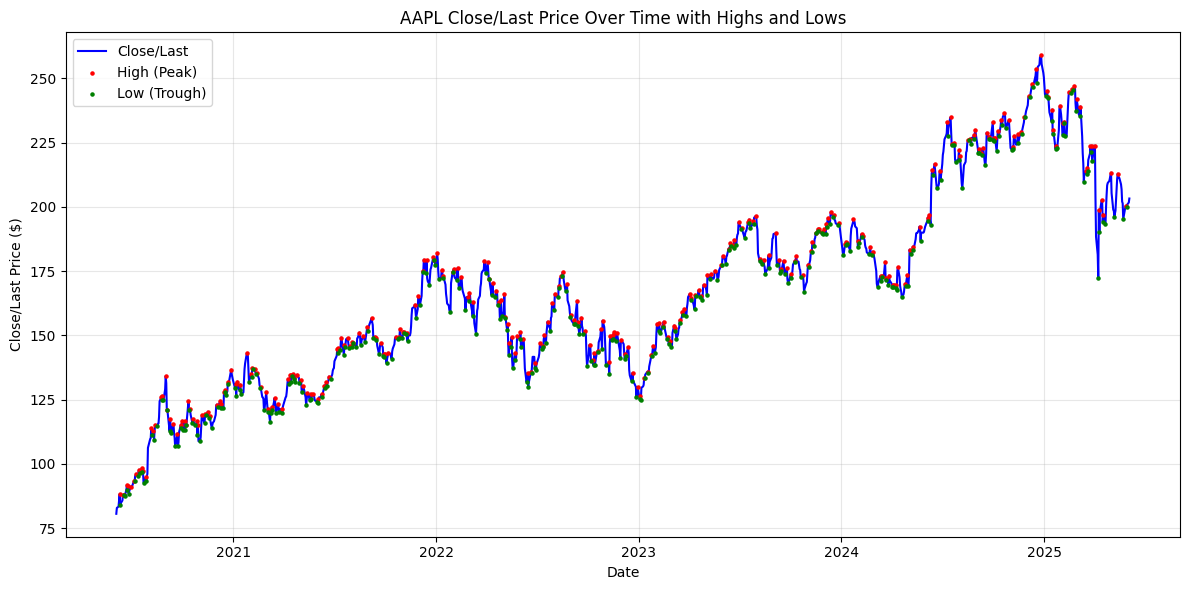

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the main price line
plt.plot(df['Date'], df['Close/Last'], label='Close/Last', color='blue', linewidth=1.5)

# Plot inflection points with different colors for high and low
if len(df_inflex) > 0:
    # High points
    high_points = df_inflex[df_inflex['point'] == 'high']
    plt.scatter(high_points['Date'], high_points['InflexionPrice'], 
                color='red', s=5, zorder=5, label='High (Peak)')
    
    # Low points
    low_points = df_inflex[df_inflex['point'] == 'low']
    plt.scatter(low_points['Date'], low_points['InflexionPrice'], 
                color='green', s=5, zorder=5, label='Low (Trough)')
    
    # Optional: Annotate each inflection point
    for idx, row in df_inflex.iterrows():
        if idx % 2 == 0:
            xytext = (10, 10)
        else:
            xytext = (-40, -20)
        # Uncomment to annotate:
        # plt.annotate(row['point'], (row['Date'], row['InflexionPrice']), textcoords="offset points", xytext=xytext, ha='center', fontsize=8)

plt.xlabel('Date')
plt.ylabel('Close/Last Price ($)')
plt.title('AAPL Close/Last Price Over Time with Highs and Lows')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [108]:
WINDOW_SIZE = 5  # Adjust window size as needed
df_inflex['SmoothedPrice'] = df['Close/Last'].rolling(WINDOW_SIZE).mean()
print(df_inflex['SmoothedPrice'].head())

print(df['Close/Last'].head())

0    201.238
1    200.626
2    199.340
3    199.442
4    199.870
Name: SmoothedPrice, dtype: float64
1255    80.5800
1254    82.8750
1253    83.3650
1252    85.9975
1251    88.2100
Name: Close/Last, dtype: float64


#### Uptrend

In [127]:
import pandas as pd
import numpy as np

# Initialize lists to store trend data
trend_date = []
trend = []
point = []  # HH, HL, LH, LL
local_minimum = float('inf')
local_maximum = float('-inf')
THRESHOLD = 0.01  # 1%

# Iterate through the inflexion points in the dataset
for i in range(1, len(df_inflex) - 1):
    current = df_inflex.iloc[i]
    prev = df_inflex.iloc[i - 1]
    next_ = df_inflex.iloc[i + 1]

    # Skip rows with NaN values in rolling means
    if np.isnan(current["5_day_mean"]) or np.isnan(current["21_day_mean"]):
        continue

    # For highs
    if current['point'] == "high":
        if prev['point'] == "low" and next_['point'] == "low":
            perc_change = abs(current['5_day_mean'] - prev['InflexionPrice']) / prev['InflexionPrice']

            if current["5_day_mean"] > current["21_day_mean"]:  # Bullish confirmation
                if next_['InflexionPrice'] > prev['InflexionPrice'] and perc_change > THRESHOLD:
                    trend.append('bullish')
                    trend_date.append(current['Date'])
                    point.append('HH')  # Higher High
            else:  # Bearish confirmation
                if next_['InflexionPrice'] < prev['InflexionPrice'] and perc_change > THRESHOLD:
                    trend.append('bearish')
                    trend_date.append(current['Date'])
                    point.append('LH')  # Lower High

    # For lows
    if current['point'] == "low":
        if prev['point'] == "high" and next_['point'] == "high":
            perc_change = abs(current['5_day_mean'] - prev['InflexionPrice']) / prev['InflexionPrice']

            if current["5_day_mean"] > current["21_day_mean"]:  # Bullish confirmation
                if next_['InflexionPrice'] > prev['InflexionPrice'] and perc_change > THRESHOLD:
                    trend.append('bullish')
                    trend_date.append(current['Date'])
                    point.append('HL')  # Higher Low
            else:  # Bearish confirmation
                if next_['InflexionPrice'] < prev['InflexionPrice'] and perc_change > THRESHOLD:
                    trend.append('bearish')
                    trend_date.append(current['Date'])
                    point.append('LL')  # Lower Low

# Create a DataFrame for trend markers
trend_df = pd.DataFrame({'Date': trend_date, 'Trend': trend, 'Point': point})

# Debug: Inspect the trend_df
print(trend_df.head())

        Date    Trend Point
0 2020-07-07  bullish    HL
1 2020-07-10  bullish    HH
2 2020-07-17  bullish    HL
3 2020-07-27  bullish    HH
4 2020-08-06  bullish    HH


In [128]:
count_high_low = trend_df['Point'].value_counts()
print(count_high_low)

count_bear_bull = trend_df['Trend'].value_counts()
print(count_bear_bull)

Point
HH    73
HL    57
LL    57
LH    43
Name: count, dtype: int64
Trend
bullish    130
bearish    100
Name: count, dtype: int64


#### Visualization on trend

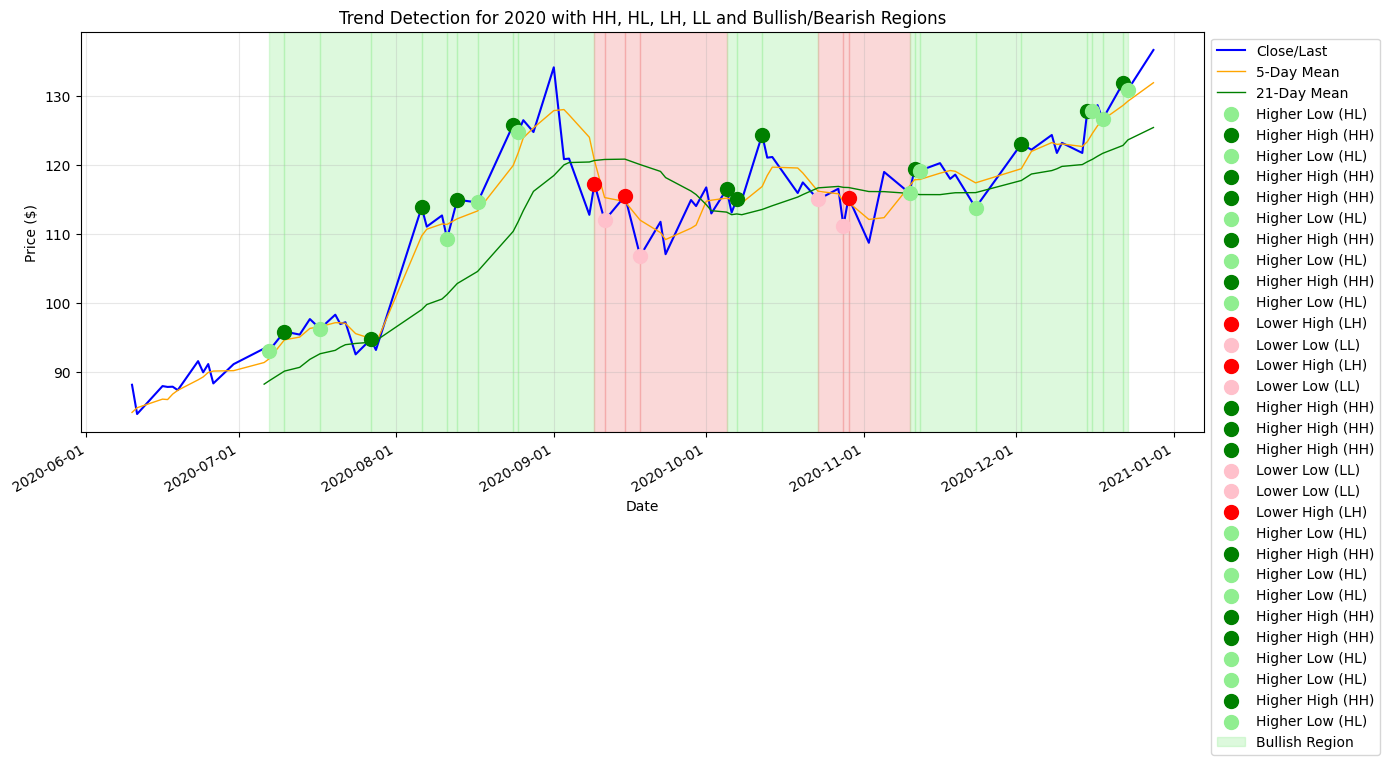

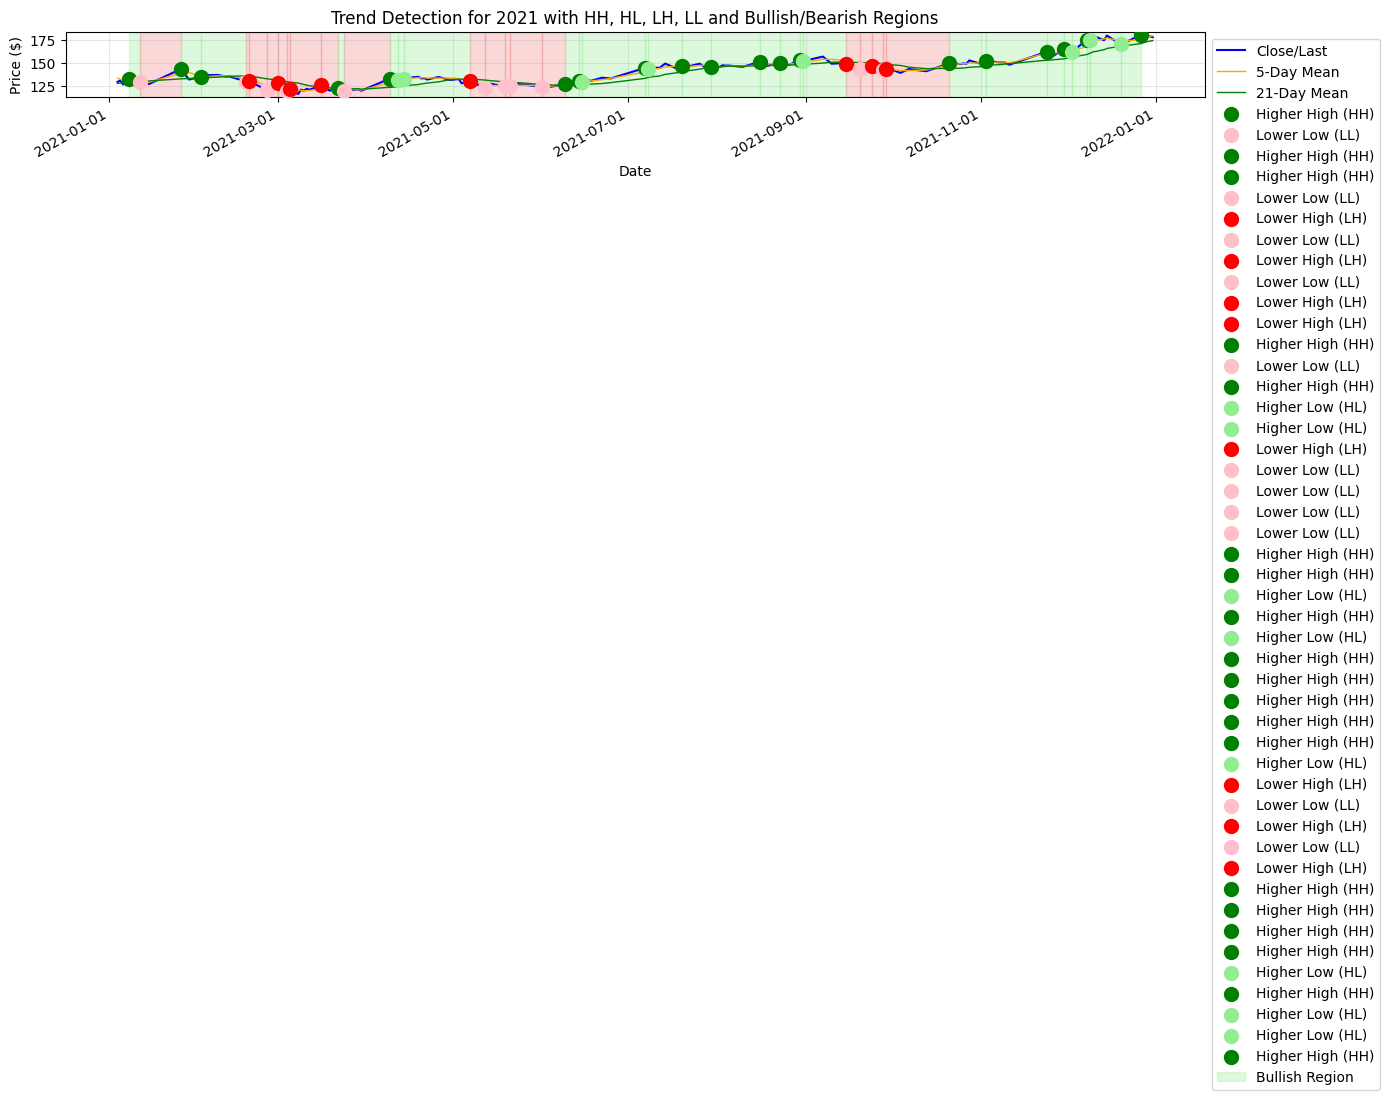

C:\Users\user\AppData\Local\Temp\ipykernel_44604\349131206.py:61: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


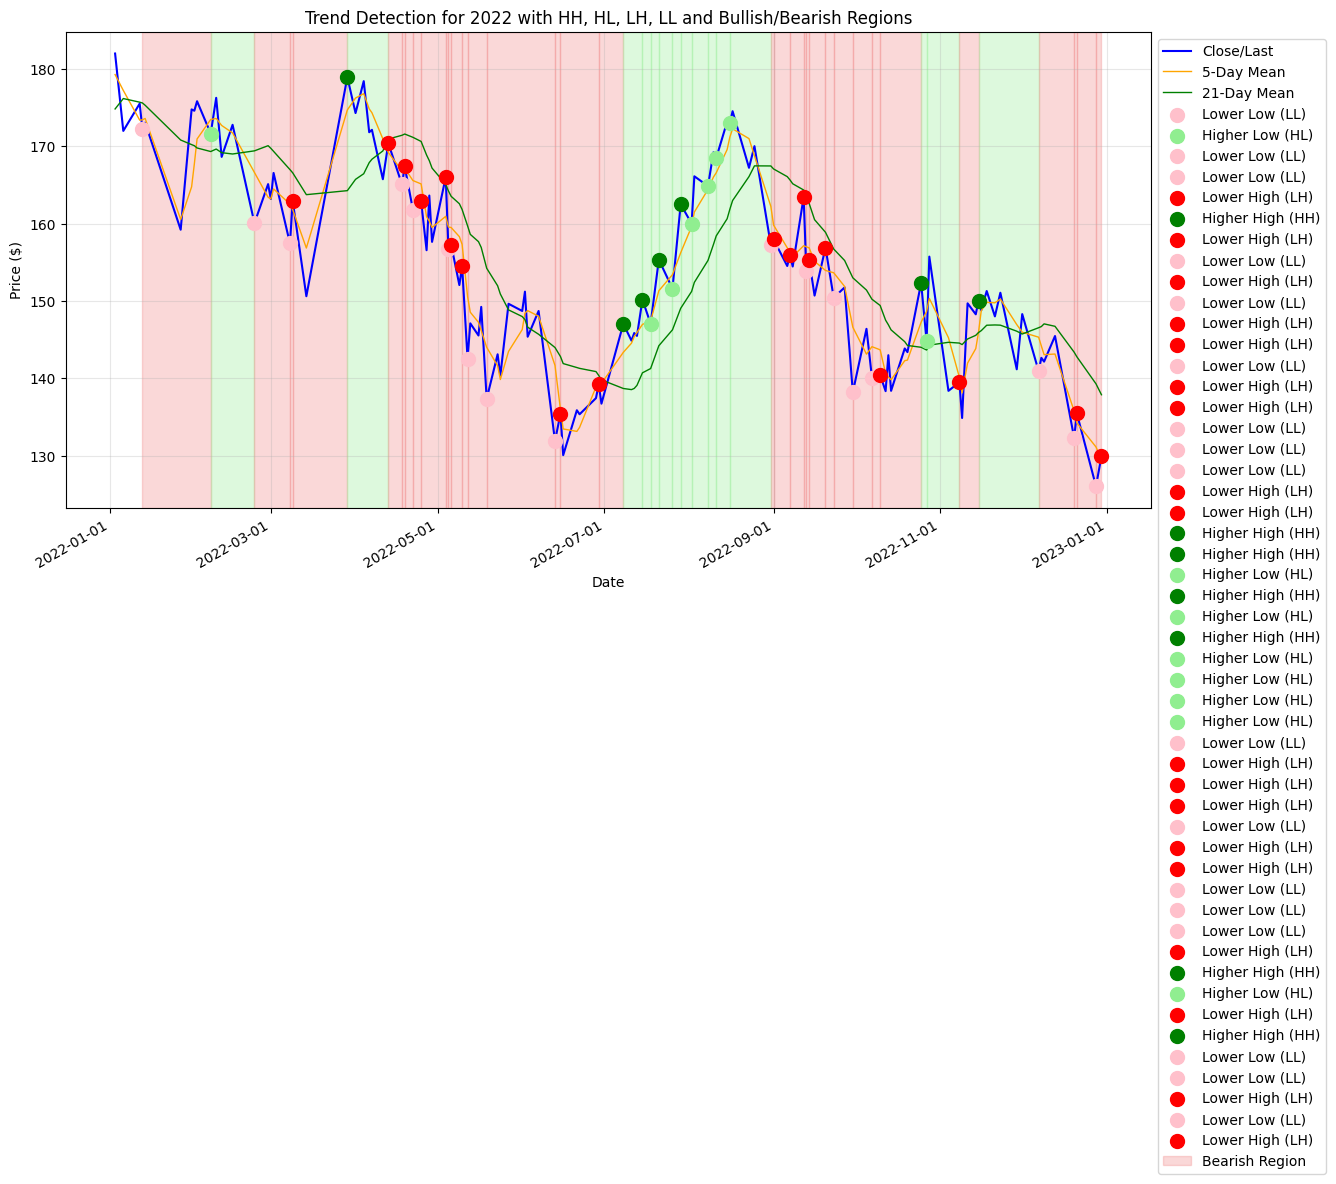

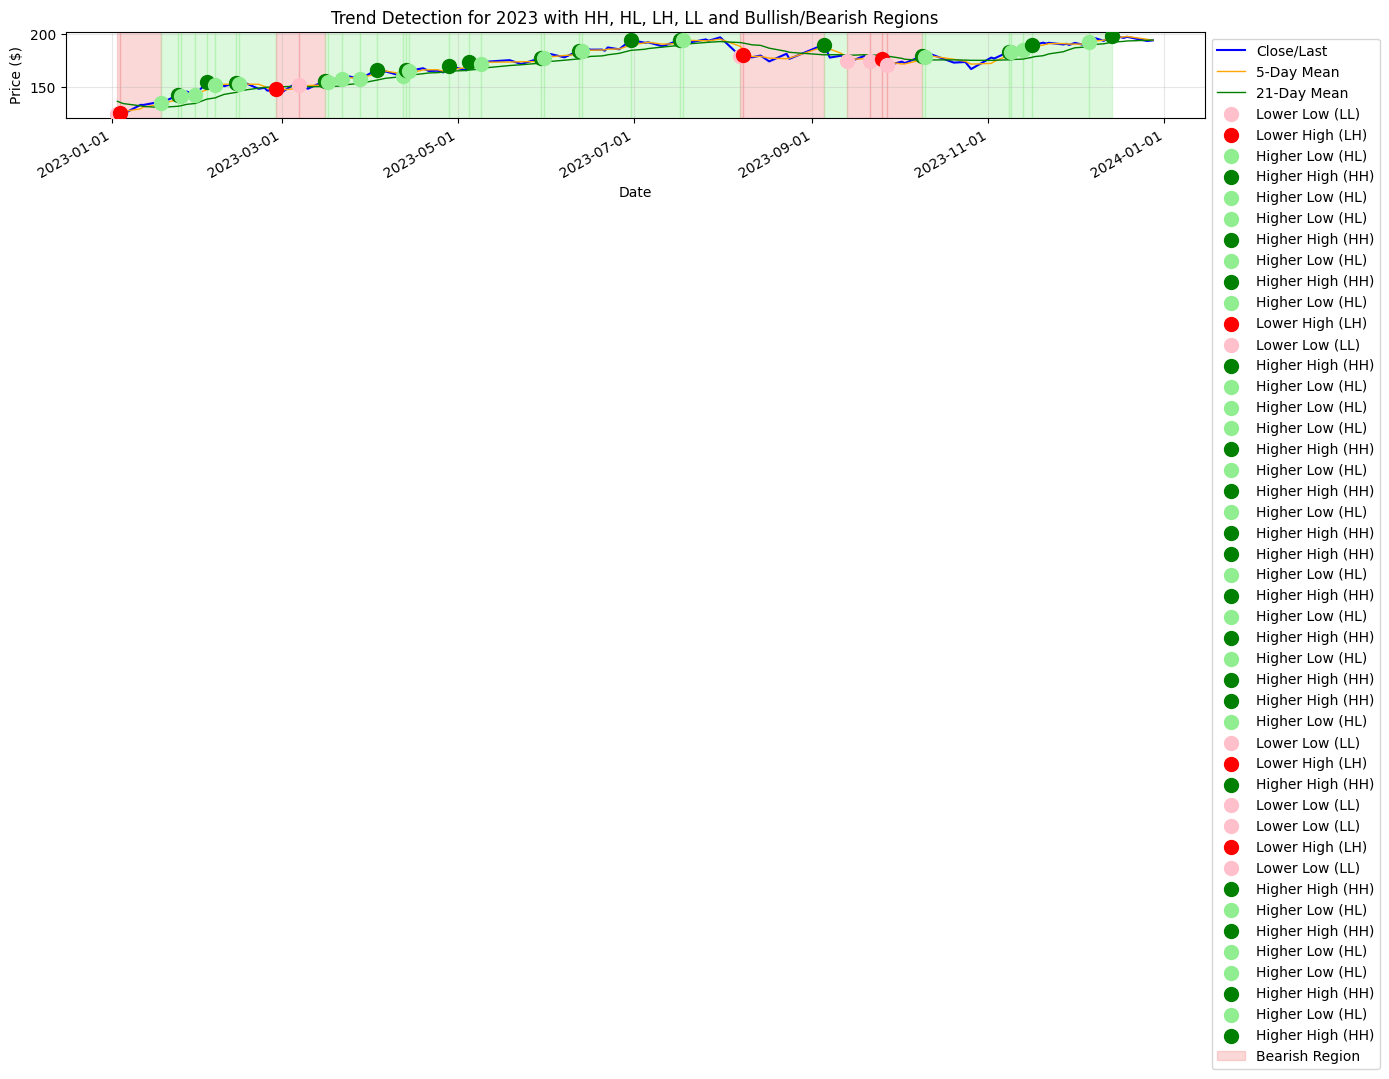

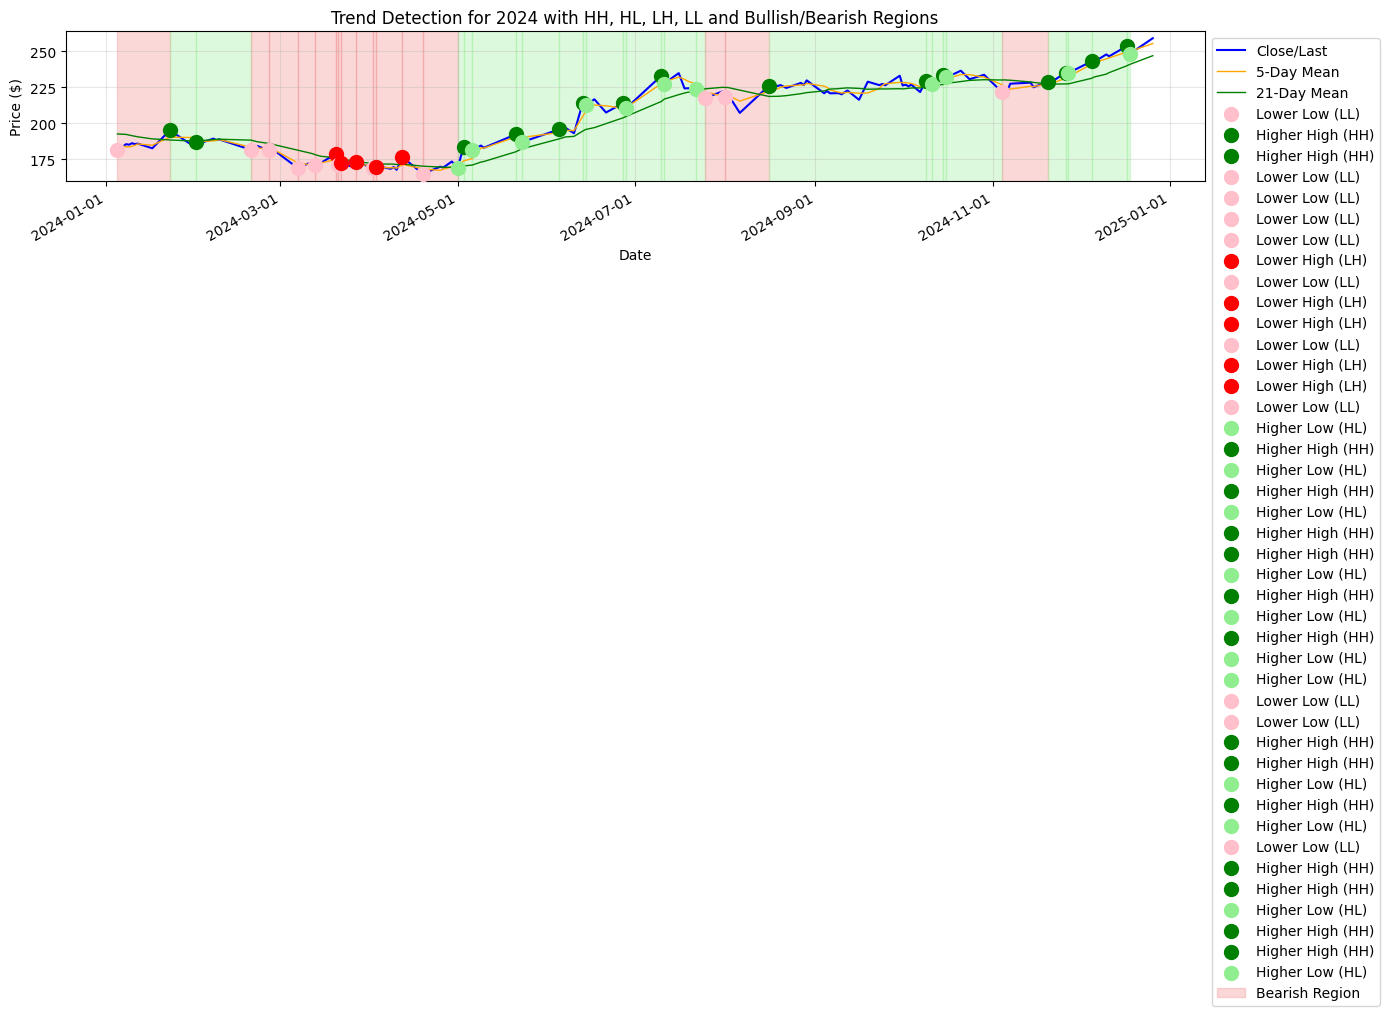

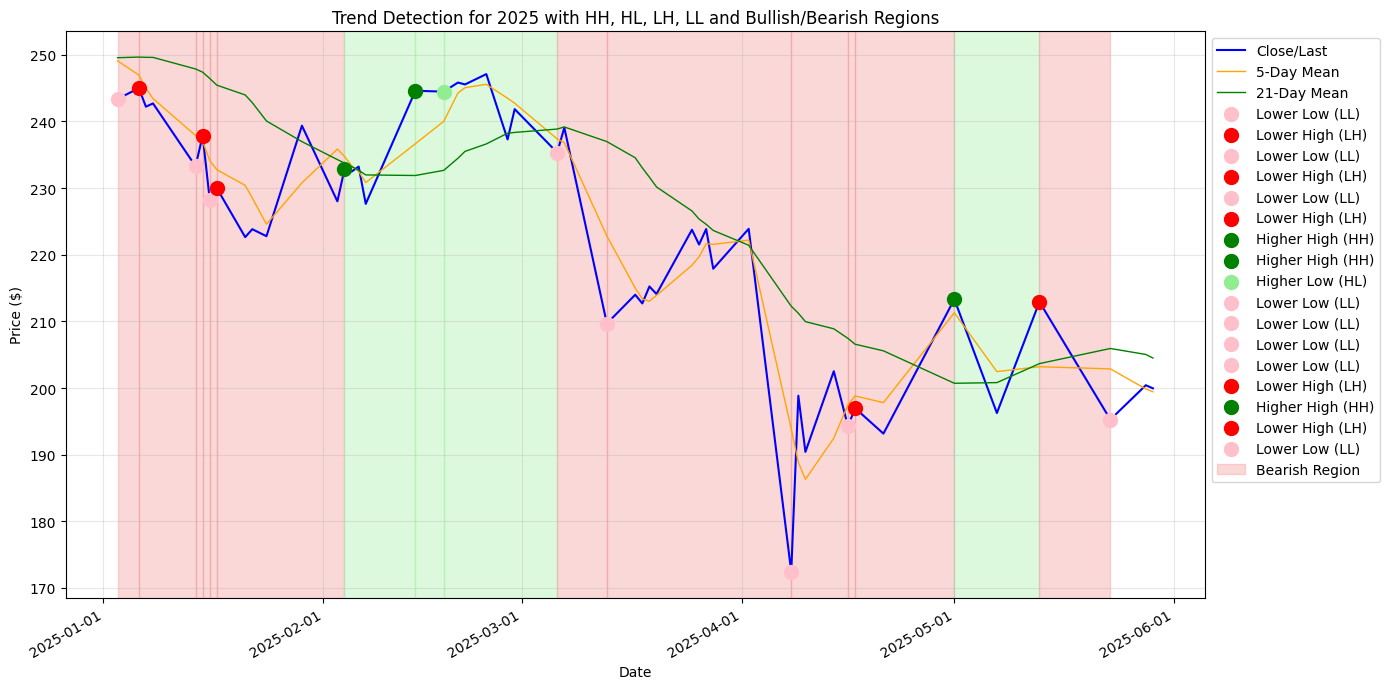

In [130]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure Date columns are in datetime format
df_inflex['Date'] = pd.to_datetime(df_inflex['Date'])
trend_df['Date'] = pd.to_datetime(trend_df['Date'])

# Extract unique years from the dataset
years = sorted(df_inflex['Date'].dt.year.unique())

# Iterate over each year and plot
for year in years:
    # Filter data for the current year
    df_year = df_inflex[df_inflex['Date'].dt.year == year]
    trend_df_year = trend_df[trend_df['Date'].dt.year == year]

    # Create a new figure
    plt.figure(figsize=(14, 7))

    # Plot the Close/Last price and rolling means
    plt.plot(df_year['Date'], df_year['InflexionPrice'], label='Close/Last', color='blue', linewidth=1.5)
    plt.plot(df_year['Date'], df_year['5_day_mean'], label='5-Day Mean', color='orange', linewidth=1)
    plt.plot(df_year['Date'], df_year['21_day_mean'], label='21-Day Mean', color='green', linewidth=1)

    # Add markers for HH, HL, LH, LL
    for idx, row in trend_df_year.iterrows():
        date = row['Date']
        price = df_year[df_year['Date'] == date]['InflexionPrice'].values
        if len(price) == 0:
            continue  # Skip if price is not found
        price = price[0]
        
        if row['Point'] == 'HH':  # Higher High
            plt.scatter(date, price, color='green', label='Higher High (HH)', s=100, zorder=5)
        elif row['Point'] == 'HL':  # Higher Low
            plt.scatter(date, price, color='lightgreen', label='Higher Low (HL)', s=100, zorder=5)
        elif row['Point'] == 'LH':  # Lower High
            plt.scatter(date, price, color='red', label='Lower High (LH)', s=100, zorder=5)
        elif row['Point'] == 'LL':  # Lower Low
            plt.scatter(date, price, color='pink', label='Lower Low (LL)', s=100, zorder=5)

    # Shade bullish and bearish regions
    for i in range(len(trend_df_year) - 1):
        start_date = trend_df_year.iloc[i]['Date']
        end_date = trend_df_year.iloc[i + 1]['Date']
        trend_type = trend_df_year.iloc[i]['Trend']

        if trend_type == 'bullish':
            plt.axvspan(start_date, end_date, color='lightgreen', alpha=0.3, label='Bullish Region' if i == 0 else "")
        elif trend_type == 'bearish':
            plt.axvspan(start_date, end_date, color='lightcoral', alpha=0.3, label='Bearish Region' if i == 0 else "")

    # Format the plot
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.title(f'Trend Detection for {year} with HH, HL, LH, LL and Bullish/Bearish Regions')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot
    plt.grid(alpha=0.3)
    plt.tight_layout()

    # Show the plot
    plt.show()

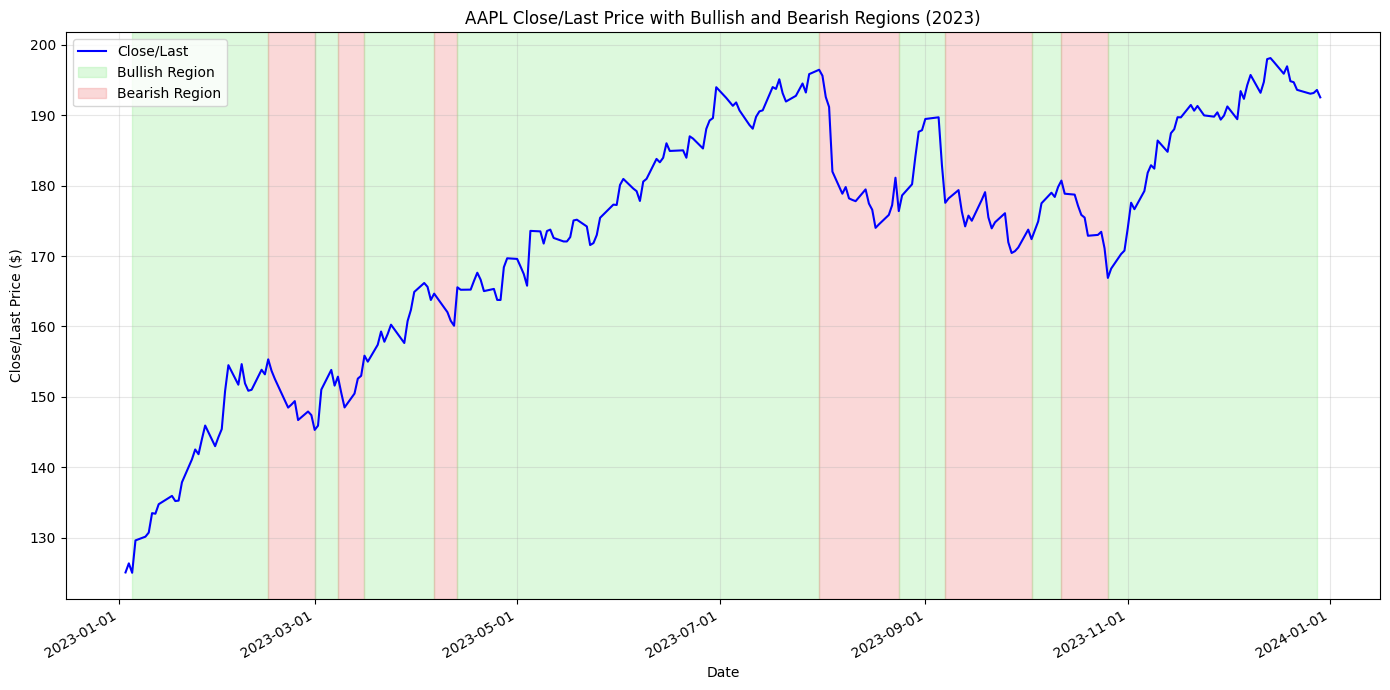

In [119]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Ensure Date columns are datetime
df['Date'] = pd.to_datetime(df['Date'])
trend_df['Date'] = pd.to_datetime(trend_df['Date'])

# Filter for dates within 2023
df_2023 = df[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-12-31')]
trend_df_2023 = trend_df[(trend_df['Date'] >= '2023-01-01') & (trend_df['Date'] <= '2023-12-31')]

plt.figure(figsize=(14, 7))

# Plot the main price line for 2023
plt.plot(df_2023['Date'], df_2023['Close/Last'], label='Close/Last', color='blue', linewidth=1.5)

# Format full date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

# Shade bullish and bearish regions
for i in range(len(trend_df_2023) - 1):
    start_date = trend_df_2023.iloc[i]['Date']
    end_date = trend_df_2023.iloc[i + 1]['Date']
    trend_type = trend_df_2023.iloc[i]['Trend']

    if trend_type == 'bullish':
        plt.axvspan(start_date, end_date, color='lightgreen', alpha=0.3, label='Bullish Region' if i == 0 else "")
    elif trend_type == 'bearish':
        plt.axvspan(start_date, end_date, color='lightcoral', alpha=0.3, label='Bearish Region' if i == 0 else "")

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Close/Last Price ($)')
plt.title('AAPL Close/Last Price with Bullish and Bearish Regions (2023)')
plt.legend(['Close/Last', 'Bullish Region', 'Bearish Region'], loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

#### Uptrend with local maxima

# trend_df = pd.DataFrame({'Date': trend_date, 'Trend': trend, 'Point': point})